In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [2]:
# Load Airlines Passengers dataset
cocacola_data = pd.read_excel('/content/CocaCola_Sales_Rawdata.xlsx')




In [3]:
cocacola_data.shape

(42, 2)

In [4]:
cocacola_data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
# Convert 'Quarter' to datetime and set as index
#cocacola_data['Quarter'] = pd.to_datetime(cocacola_data['Quarter'].str.replace('_', ' '), format='%b %y')
#cocacola_data.set_index('Quarter', inplace=True)
# Extract year and quarter
cocacola_data['Year'] = cocacola_data['Quarter'].str[1:3]
cocacola_data['Quarter'] = cocacola_data['Quarter'].str[0]

# Map quarter to month
quarter_to_month = {'1': '01', '2': '04', '3': '07', '4': '10'}
cocacola_data['Month'] = cocacola_data['Quarter'].map(quarter_to_month)

# Combine year and month
cocacola_data['Quarter'] = pd.to_datetime(cocacola_data['Year'] + '-' + cocacola_data['Month'], format='%y-%m')
cocacola_data.drop(columns=['Year', 'Month'], inplace=True)
cocacola_data.set_index('Quarter', inplace=True)

In [6]:
print(cocacola_data)

               Sales
Quarter             
NaT      1734.827000
NaT      2244.960999
NaT      2533.804993
NaT      2154.962997
NaT      1547.818996
NaT      2104.411995
NaT      2014.362999
NaT      1991.746998
NaT      1869.049999
NaT      2313.631996
NaT      2128.320000
NaT      2026.828999
NaT      1910.603996
NaT      2331.164993
NaT      2206.549995
NaT      2173.967995
NaT      2148.278000
NaT      2739.307999
NaT      2792.753998
NaT      2556.009995
NaT      2480.973999
NaT      3039.522995
NaT      3172.115997
NaT      2879.000999
NaT      2772.000000
NaT      3550.000000
NaT      3508.000000
NaT      3243.859993
NaT      3056.000000
NaT      3899.000000
NaT      3629.000000
NaT      3373.000000
NaT      3352.000000
NaT      4342.000000
NaT      4461.000000
NaT      4017.000000
NaT      3854.000000
NaT      4936.000000
NaT      4895.000000
NaT      4333.000000
NaT      4194.000000
NaT      5253.000000


In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model_cocacola = ARIMA(cocacola_data, order=(1, 1, 1))
results_cocacola = model_cocacola.fit()

# Forecast for next 6 quarters
forecast_cocacola = results_cocacola.forecast(steps=6)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

In [8]:

print("\nForecast for CocaCola Sales:")
print(forecast_cocacola)



Forecast for CocaCola Sales:
42    4898.261729
43    4831.270173
44    4818.618962
45    4816.229808
46    4815.778622
47    4815.693416
Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Frequency')

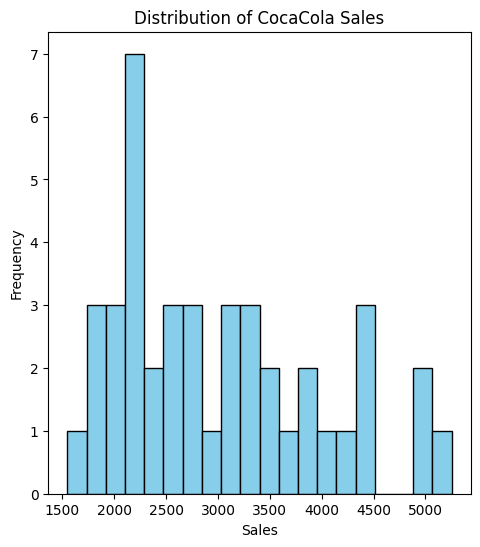

In [14]:
# Visualize the data for CocaCola prices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(cocacola_data['Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of CocaCola Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

In [9]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [10]:
# Load the CocaCola prices dataset
airlines_data = pd.read_excel('/content/Airlines+Data.xlsx',header=0,index_col=0)

In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model
model_airlines = SARIMAX(airlines_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results_airlines = model_airlines.fit()

# Forecast for next 12 months
forecast_airlines = results_airlines.forecast(steps=12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [12]:
print("Forecast for Airlines Passengers:")
print(forecast_airlines)

Forecast for Airlines Passengers:
2003-01-01    314.548014
2003-02-01    307.007891
2003-03-01    345.490165
2003-04-01    343.037241
2003-05-01    346.976074
2003-06-01    400.910547
2003-07-01    442.428199
2003-08-01    432.247790
2003-09-01    385.511635
2003-10-01    338.661204
2003-11-01    302.821002
2003-12-01    339.613028
Freq: MS, Name: predicted_mean, dtype: float64


Text(0, 0.5, 'Frequency')

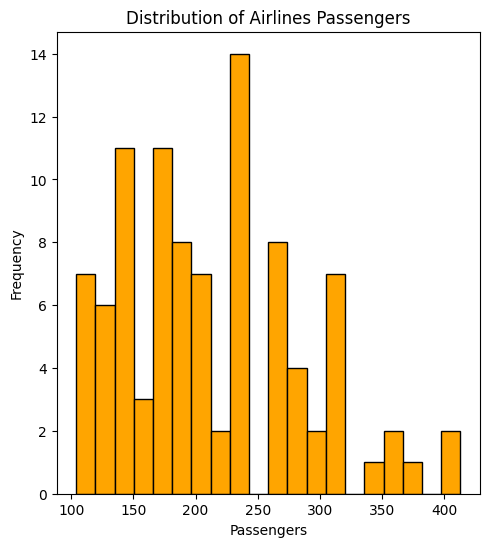

In [21]:
# Visualize the data for Airlines passengers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(airlines_data['Passengers'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Airlines Passengers')
plt.xlabel('Passengers')
plt.ylabel('Frequency')

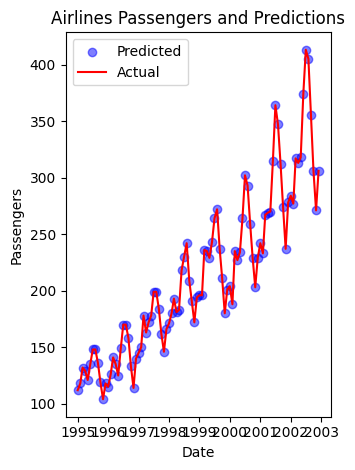

In [25]:
plt.subplot(1, 2, 2)
plt.scatter(airlines_data.index, airlines_data['Passengers'], color='blue', alpha=0.5)
plt.plot(airlines_data.index, airlines_data, color='red')
plt.title('Airlines Passengers and Predictions')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend(['Predicted', 'Actual'])

plt.tight_layout()
plt.show()